In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

# Map1D_TM
---

In [2]:
from gpt.maps import Map1D_TM
cav = Map1D_TM('Buncher', 'fields/buncher_CTB_1D.gdf', column_names={'Z':'z', 'Ez':'Ez'}, frequency=1.3e9, scale=10e6, relative_phase=0)

# Basic Tracking routines
Checkingthe basic routines useful for working with a Map1D_TM object: `track_on_axis` and `auto_phase`.

First run the `track_on_axis`

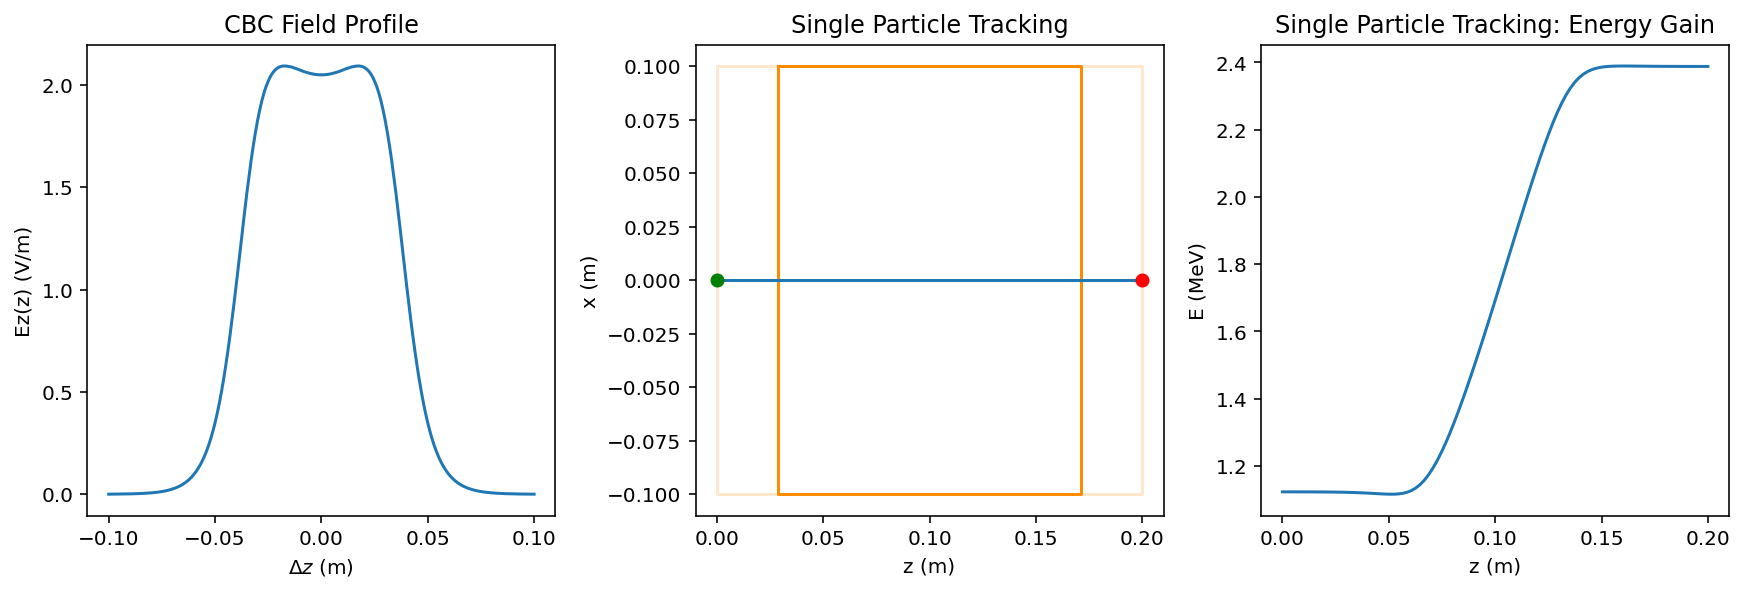

In [3]:
G = cav.track_on_axis(t=0, p=1e6, n_screen=100)

fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))
ax[0].plot(cav['Z'], cav['Ez']);
ax[0].set_xlabel('$\Delta z$ (m)');
ax[0].set_ylabel('Ez(z) (V/m)');
ax[0].set_title('CBC Field Profile');

cav.plot_floor(ax=ax[1])
ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0],'og');
ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1],'or');
ax[1].set_title('Single Particle Tracking')

ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')/1e6);
ax[2].set_xlabel('z (m)');
ax[2].set_ylabel('E (MeV)');
ax[2].set_title('Single Particle Tracking: Energy Gain');

# Autophasing

CPU times: user 133 ms, sys: 220 ms, total: 353 ms
Wall time: 751 ms


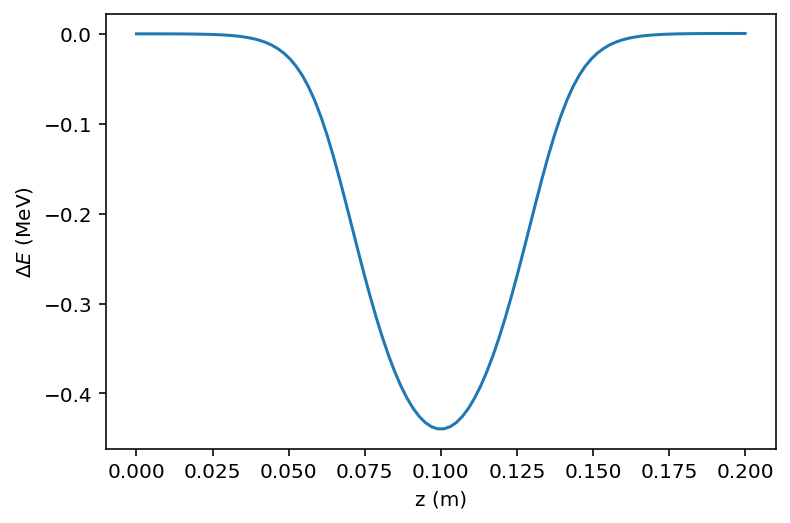

In [4]:
p=10e6
cav._relative_phase=-90

%time G=cav.autophase(t=0, p=p)

plt.plot(G.stat('mean_z','screen'), (G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy'])/1e6);
plt.xlabel('z (m)');
plt.ylabel('$\Delta E$ (MeV)');

# Test Placement in a Lattice

In [5]:
from gpt.element import Lattice

In [6]:
lat = Lattice('cavity')
lat.add(Map1D_TM('Buncher', 'fields/buncher_CTB_1D.gdf', column_names={'Z':'z', 'Ez':'Ez'}, frequency=1.3e9, scale=10e6, relative_phase=0), ds=1.0)

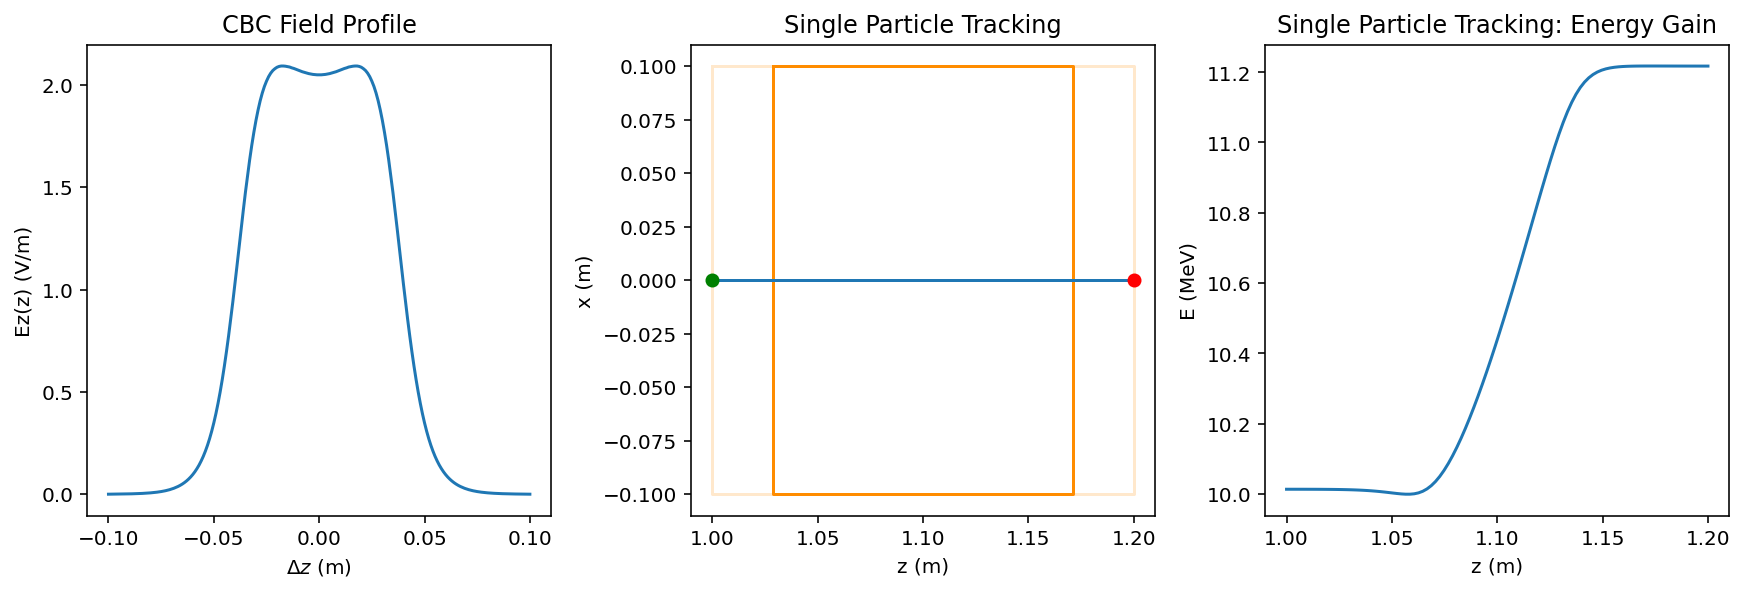

In [7]:
G = lat['Buncher'].track_on_axis(t=0, p=10e6, n_screen=100)

fig, ax = plt.subplots(1, 3, sharex='col', constrained_layout=True, figsize=(12,4))
ax[0].plot(cav['Z'], cav['Ez']);
ax[0].set_xlabel('$\Delta z$ (m)');
ax[0].set_ylabel('Ez(z) (V/m)');
ax[0].set_title('CBC Field Profile');

lat['Buncher'].plot_floor(ax=ax[1])
ax[1].plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'));
ax[1].plot(G.stat('mean_z','screen')[0], G.stat('mean_x', 'screen')[0],'og');
ax[1].plot(G.stat('mean_z','screen')[-1], G.stat('mean_x', 'screen')[-1],'or');
ax[1].set_title('Single Particle Tracking')

ax[2].plot(G.stat('mean_z','screen'), G.stat('mean_energy', 'screen')/1e6)
ax[2].set_xlabel('z (m)');
ax[2].set_ylabel('E (MeV)');
ax[2].set_title('Single Particle Tracking: Energy Gain');

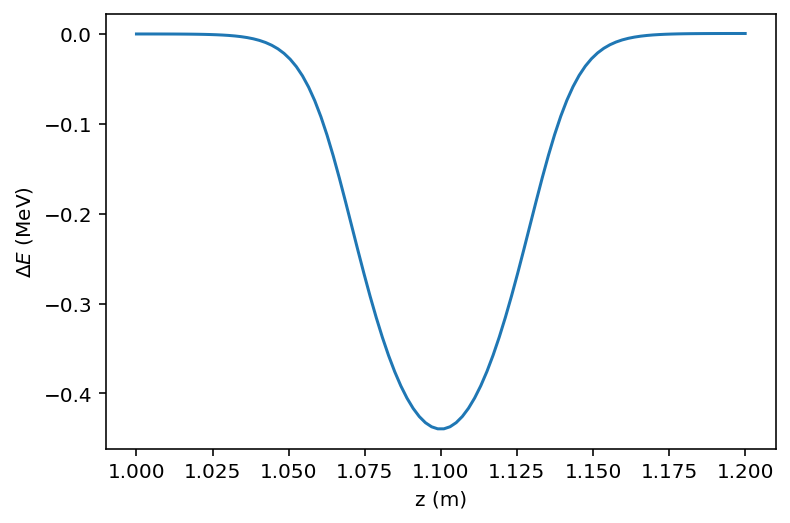

In [8]:
lat['Buncher']._relative_phase=-90
G = lat['Buncher'].autophase(t=0, p=10e6)
plt.plot(G.stat('mean_z','screen'), (G.stat('mean_energy', 'screen')-G.screen[0]['mean_energy'])/1e6);
plt.xlabel('z (m)');
plt.ylabel('$\Delta E$ (MeV)');